In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

Beginning in October, 2015, Powerball® became an even larger combined large jackpot game and cash game. Every Wednesday and Saturday night at 10:59 p.m. Eastern Time, we draw five white balls out of a drum with 69 balls and one red ball out of a drum with 26 red balls. This change means bigger jackpots. It also means that your odds of winning some prize are improved.

The jackpot - won by matching all five white balls in any order and the red Powerball - is either an annuitized prize paid out over 29 years (30 payments counting the first immediate payment) or a cash lump sum payment. If you choose the cash, then you get the cash, pay the tax, and can invest what is left over. If you choose the annuity, then we can invest the cash amount pre-tax, less an immediate first payment (more to invest means more earnings). With the annuity, you get an annual payment that is increased by 5% each year to keep up with the cost of living.

The second prize - won by matching five white balls in any order - is $1,000,000 paid in cash (no annuity option). You win by matching at least three white ball numbmers. Any time you match the red Powerball, you win a prize. The overall odds of winning a prize in the game are approximately 1 in 25. Players win a prize by matching one of the 9 Ways to Win.

Each ticket costs $2. Draw sales cut off at least 59 minutes before the draw, but a state may cut off sales earlier. Check with your state lottery for your cut-off time.

To win the grand prize, the ticket must match all five numbers (in any order) and the red Powerball number.

10/07/15  Game Change - Powerball 5/69 + 1/26	
5/69 + 1/26 matrix, jackpots start at $40 Million; Match 4 + PB now $50,000; Power Play 10X possible in draws for jackpots up to $150 Million; Still $2 per play; $1 extra for Power Play

01/18/12 Game Change - Powerball 5/59 + 1/35
5/59 + 1/35 matrix, jackpots start at $40 Million; Match 5 prize now $1 Million cash; Power Play prizes set dollar values; new price point $2 per play; $1 extra for Power Play

01/07/09 Game Change - Powerball 5/59 + 1/39
5/59 + 1/39 matrix, jackpots start at $20 Million; Power Play now selected using an RNG

08/31/05 Game Change - Powerball 5/55 + 1/42
5/55 + 1/42 matrix, jackpots start at $15 Million; Power Play wheel changed to 16 slots (2, 3, 4, 5 - four of each number)

10/09/02  Game Change - Powerball 5/53 + 1/42
5/53 + 1/42 matrix, jackpots start at $10 Million; Power Play wheel changed to 15 slots (3-2's; 3-3's; 3-4's; 6-5's)


11/05/97  Game Change - Powerball 5/49 + 1/42	
5/49 + 1/42 matrix, jackpots start at $10 Million

04/22/92 New Game - Powerball 5/45 + 1/45	
5/45 + 1/45 matrix, jackpots start at $2 Million

In [2]:
# Choose
#fname <- file.choose()
df<- read.delim("http://www.powerball.com/powerball/winnums-text.txt",sep = "",skip=1,header=FALSE)

In [3]:
summary(df)

          V1             V2              V3              V4       
 01/01/2000:   1   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 01/01/2003:   1   1st Qu.:15.00   1st Qu.:13.00   1st Qu.:14.00  
 01/01/2005:   1   Median :28.00   Median :26.00   Median :28.00  
 01/01/2011:   1   Mean   :28.33   Mean   :27.18   Mean   :28.23  
 01/01/2014:   1   3rd Qu.:41.00   3rd Qu.:41.00   3rd Qu.:42.00  
 01/02/1999:   1   Max.   :67.00   Max.   :68.00   Max.   :69.00  
 (Other)   :1919                                                  
       V5              V6              V7              V8        
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:15.00   1st Qu.:14.00   1st Qu.:10.00   1st Qu.: 2.000  
 Median :28.00   Median :29.00   Median :20.00   Median : 3.000  
 Mean   :28.16   Mean   :28.27   Mean   :20.01   Mean   : 3.431  
 3rd Qu.:41.00   3rd Qu.:41.00   3rd Qu.:30.00   3rd Qu.: 5.000  
 Max.   :69.00   Max.   :69.00   Max.   :42.00   Max.   :10.000  
  

In [4]:
# count blanks remove blanks
#barplot(colSums(!is.na(df)))
colSums(!is.na(df)) ## Count blanks
#df <- na.omit(df) ## THis will remove blanks

V1   V2   V3   V4   V5   V6   V7   V8 
1925 1925 1925 1925 1925 1925 1925 1366

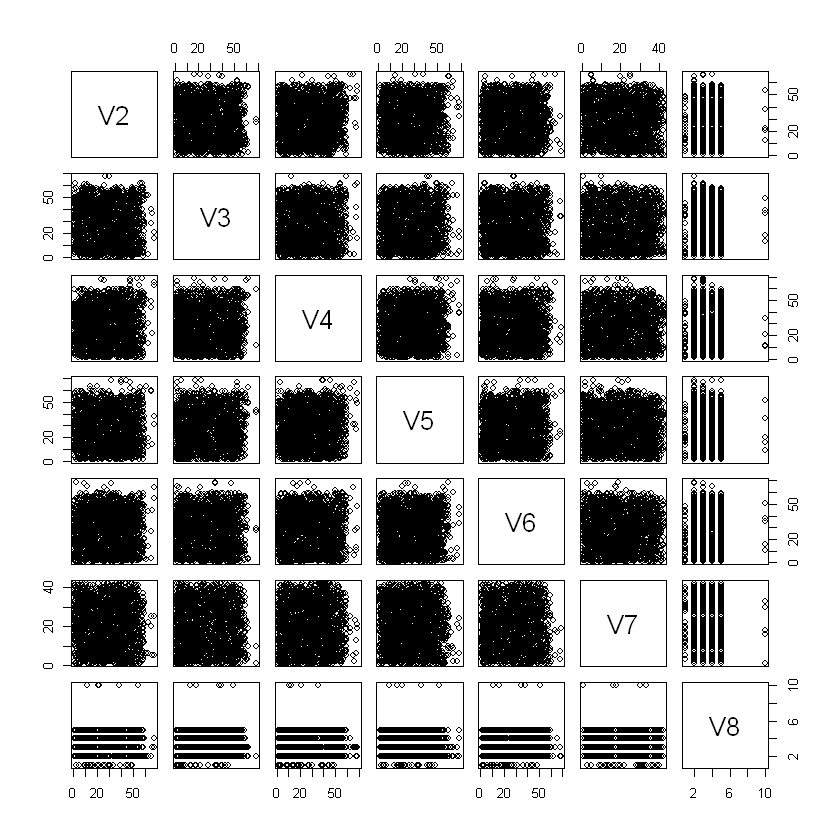

In [5]:
plot(df[,-1])

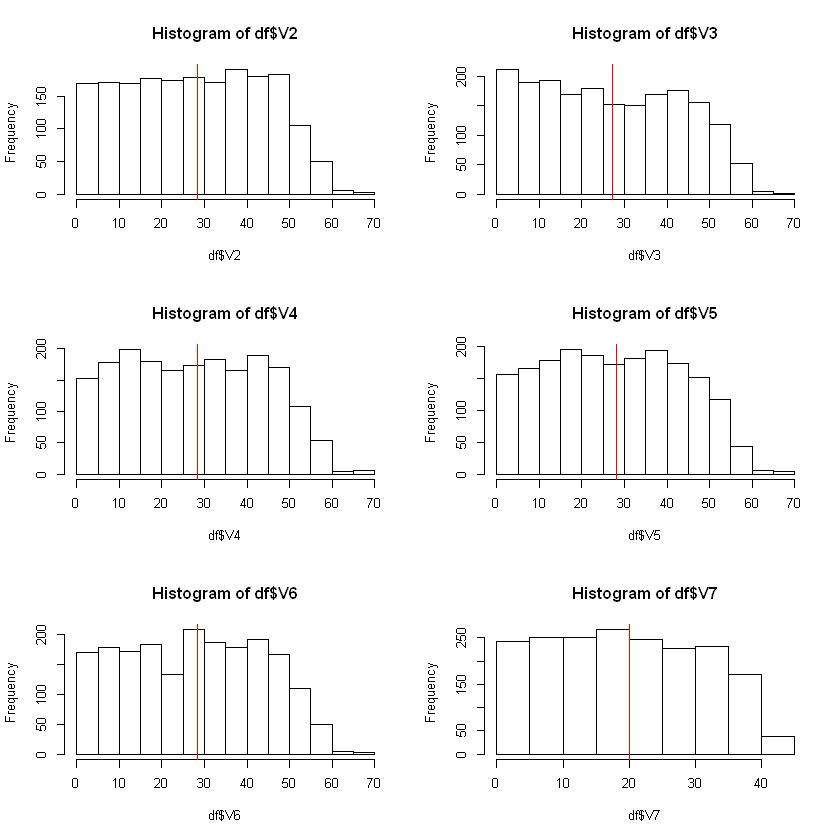

In [6]:
par(mfrow=c(3,2))
hist(df$V2)
abline(v=mean(df$V2),col="red")
hist(df$V3)
abline(v=mean(df$V3),col="red")
hist(df$V4)
abline(v=mean(df$V4),col="red")
hist(df$V5)
abline(v=mean(df$V5),col="red")
hist(df$V6)
abline(v=mean(df$V6),col="red")
hist(df$V7)
abline(v=mean(df$V7),col="red")

In [7]:
n1<-head(sort(table(df$V2),decreasing=TRUE))
n2<-head(sort(table(df$V3),decreasing=TRUE))
n3<-head(sort(table(df$V4),decreasing=TRUE))
n4<-head(sort(table(df$V5),decreasing=TRUE))
n5<-head(sort(table(df$V6),decreasing=TRUE))
n6<-head(sort(table(df$V7),decreasing=TRUE))

In [8]:
c(n1[1],n2[1],n3[1],n4[1],n5[2],n6[1])
c(n1[2],n2[2],n3[2],n4[2],n5[1],n6[2])
c(n1[3],n2[3],n3[3],n4[3],n5[3],n6[3])
c(n1[5],n2[4],n3[4],n4[4],n5[4],n6[4])
c(n1[4],n2[5],n3[5],n4[5],n5[5],n6[5])

40  5 32 16 41 20 
46 48 46 47 48 65

41  2 19 34 26  6 
46 47 45 47 52 61

17 15 42 20 30  2 
45 47 45 46 46 60

12 22 13 40 32 18 
43 44 44 46 45 56

22  4 14 38  3 23 
44 43 44 43 43 56

In [9]:
sort(table(df$V3))

60 61 68 62 59 57 58 55 56 29 31 54 53 51 17 48 27 46 50 38 21 41 19 35  3 32 
 2  2  2  3 11 13 13 14 14 22 22 22 24 25 26 26 27 27 27 28 29 29 30 30 31 31 
40 23 30  6 12 33 44 52 26 37 45 47  9 16 25 34  8 13 14 18 28 36 39 11 24 42 
31 32 32 33 33 33 33 33 34 34 34 34 35 35 35 35 37 37 37 38 38 38 38 39 39 39 
20 43 49  1 10  4  7 22  2 15  5 
41 41 41 42 42 43 43 44 47 47 48

In [10]:
df

V1 V2 V3 V4 V5 V6 V7 V8
1    04/09/2016 14 23 41 61 22  9  3
2    04/06/2016 65 28 49 60  4 25  2
3    04/02/2016  9 61 28 40 30  3  2
4    03/30/2016 55 24 63 53 44 19  2
5    03/26/2016 23 42 68 52 11  6  3
6    03/23/2016 22 15 49  5  8 25  3
7    03/19/2016 11 60 23 54 43  3  3
8    03/16/2016 46 50 12 13 10 21  3
9    03/12/2016 28 11 50 57 62 23  2
10   03/09/2016 32 34 14 23 68  3  3
11   03/05/2016  3 34 27 59 69 19  2
12   03/02/2016 62 52 13 12 44  6  2
13   02/27/2016 22 11 53 21 10 18  3
14   02/24/2016 67 21 65 31 64  5  3
15   02/20/2016 54 12 11 16 15 25  5
16   02/17/2016 29 27  7 40 17 25  2
17   02/13/2016  7 15 36 18 19 20  2
18   02/10/2016  2 62 40 50  3  5  2
19   02/06/2016 13  4 36 31 52  8  3
20   02/03/2016 26 60 67 31 28 23  3
21   01/30/2016 16  5 12 31 43 18  4
22   01/27/2016 40 52  3 67 12 21  2
23   01/23/2016 32 22 40 69 34 19  4
24   01/20/2016 44  5 39 69 47 24  5
25   01/16/2016 61 52 51 64  3  6  2
26   01/13/2016  8 27 34  4 19 10  2
27   01/09/2016 32 16 19 57 34 13  3
28   01/06/2016 47  2 63 62 11 17  3
29   01/02/2016 42 15  6  5 29 10  2
30   12/30/2015 12 61 54 38 36 22  3
31   12/26/2015 65 40 44 59 27 20  2
32   12/23/2015 67 16 63 38 55 25  4
33   12/19/2015 30 68 59 41 28 10  2
34   12/16/2015  9 42 10 55 32  6  2
35   12/12/2015 62  2 30 19 14 22  2
36   12/09/2015 16 46 10 56  7  1  2
37   12/05/2015 47 33 68 27 13 13  2
38   12/02/2015 14 18 19 64 32  9  2
39   11/28/2015 47  2 66 67  6  2  3
40   11/25/2015 53 16 69 58 29 21  2
41   11/21/2015 37 57 47 50 52 21  3
42   11/18/2015 40 17 46 69 41  6  2
43   11/14/2015 66 37 22 14 45  5  3
44   11/11/2015 26  4 32 55 64 18  3
45   11/07/2015 50 53  7 16 25 15  2
46   11/04/2015 12  2 17 20 65 17  4
47   10/31/2015  9 47 20 25 68  7  2
48   10/28/2015 56 62 54 63  4 10  2
49   10/24/2015 20 31 56 64 60  2  3
50   10/21/2015 57 32 30 42 56 11  4
51   10/17/2015 57 62 69 49 48 19  3
52   10/14/2015 20 15 31 40 29  1  2
53   10/10/2015 27 68 12 43 29  1  2
54   10/07/2015 52 40 48 18 30  9  3
55   10/03/2015 33  6 46 44 26  4  2
56   09/30/2015 40 59 21 39 55 17  3
57   09/26/2015 23 57 42 31 50  5  3
58   09/23/2015  8 29 51 58 41  5  2
59   09/19/2015 12 43 17 26 48 24  2
60   09/16/2015  7  5 39 24 31  7  3
61   09/12/2015 35  3 16  2 13 27  3
62   09/09/2015 50 44 45 51 47  8  2
63   09/05/2015 29 10 18 16 45 19  2
64   09/02/2015 17 46 22 30 56 16  3
65   08/29/2015 25 18 29 21 28 16  2
66   08/26/2015 22 56  2 45 32 12  5
67   08/22/2015 12 14 21  4 55  7  4
68   08/19/2015  6 43 48 50  8  7  2
69   08/15/2015  3 17 13 52 42 24  4
70   08/12/2015 29 38  8 13 52 28  2
71   08/08/2015 34 48 54 52  9 15  4
72   08/05/2015 42 14  9 16 11 19  2
73   08/01/2015 13  7 49 24 57 15  3
74   07/29/2015  4 52 22 27 28 35  3
75   07/25/2015 27 44 41 29 34  2  3
76   07/22/2015 31 12 57 44 43 11  2
77   07/18/2015 39  6 37 45 55 33  3
78   07/15/2015 45 34 13 50 16 11  2
79   07/11/2015 46 39 52 11 54  3  2
80   07/08/2015 30 27 25 15  4 18  3
81   07/04/2015 24 18  6  3 14 21  3
82   07/01/2015 24 41 31 26  7 25  2
83   06/27/2015 35 18 46 49 28 27  5
84   06/24/2015  5 10  3 22 32  7  4
85   06/20/2015 20 16 10 57  9 15  2
86   06/17/2015 22 20 21 54 41  7  3
87   06/13/2015 41 29 52 54 48 29  2
88   06/10/2015 49 32 31 53 48 25  2
89   06/06/2015 18 43 13  8 27 15  4
90   06/03/2015  6 40 37 13  8 11  2
91   05/30/2015 57 25  8 56  9 22  2
92   05/27/2015  8 15 59 34 53 23  2
93   05/23/2015 31  9 43 17 15 16  4
94   05/20/2015 12  1 44 28 35 25  3
95   05/16/2015 48 24 38 52 29 32  2
96   05/13/2015 31 29  1 47 25  7  3
97   05/09/2015 58  4 17 35 15 17  3
98   05/06/2015 24 41 39 23 27 30  5
99   05/02/2015  2 31  6 11 30 33  3
100  04/29/2015 26  1 38 34 51  6  3
101  04/25/2015 45 21 35 33 38 12  2
102  04/22/2015 25 10 14 39 53 18  2
103  04/18/2015 31 22 13 23 29 17  3
104  04/15/2015  1 21 29 16 40 30  3
105  04/11/2015 58  1 32 42 12 12  2
106  04/08/2015  1 19 45 58 46 29  2
107  04/04/2015 41 33 39 54 40 28  3
108  04/01/2015 4

In [11]:
sort(table(df$V2))

61 66 62 65 67 59 56 51 57 58 54 53 55 21 50 52  1 33 11 13 25  3 15 34 36 43 
 1  1  2  2  2  7 12 13 13 18 19 22 24 25 26 27 28 28 29 29 29 30 30 30 30 30 
 6 18 20  4 19  9 10 28 29 42  8 35 30 44 23 39 45  2 27 38 14 16 47 48 32  7 
31 31 31 32 32 33 33 33 33 33 34 34 35 35 36 36 36 37 37 37 38 38 38 38 39 40 
24 26 31 49 37 46  5 12 22 17 40 41 
40 40 40 40 41 41 42 43 44 45 46 46